In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"0000000","key":"00000000"}'}

In [3]:
!mkdir -p ~/.kaggle #создаем директорию в папке
!cp kaggle.json ~/.kaggle/ # копирую в папку тот файл с ключом который загрузила выше
!chmod 600 ~/.kaggle/kaggle.json # редачу права пользователя на всякий случай
!kaggle competitions download -c playground-series-s4e10 # качаю данные

  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 110MB/s]


In [4]:
!unzip playground-series-s4e10.zip

Archive:  playground-series-s4e10.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [120]:
df=pd.read_csv('train.csv',header=0)

In [121]:
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [122]:
df.drop(['id'],axis=1,inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [124]:
df.nunique()

,0
person_age,53
person_income,2641
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,545
loan_int_rate,362
loan_percent_income,61
cb_person_default_on_file,2


'\nвидим что в персон инком есть очень богатые люди не можем их не учитывать это же банк\nдля многих похожне стаж работы не известен тк очень много 0\nлоан персен инкам очень крутой признак будет по ощущениям тк это отношение годовой зарплаты к сумме кредита. и если честно хочется его отлагорифмировать\n\nвообще наверное можно было бы создать фичу которя бы вычитала из возраста челловека его историю кредита. как будто полезно что бы учитывать молодых.\n'

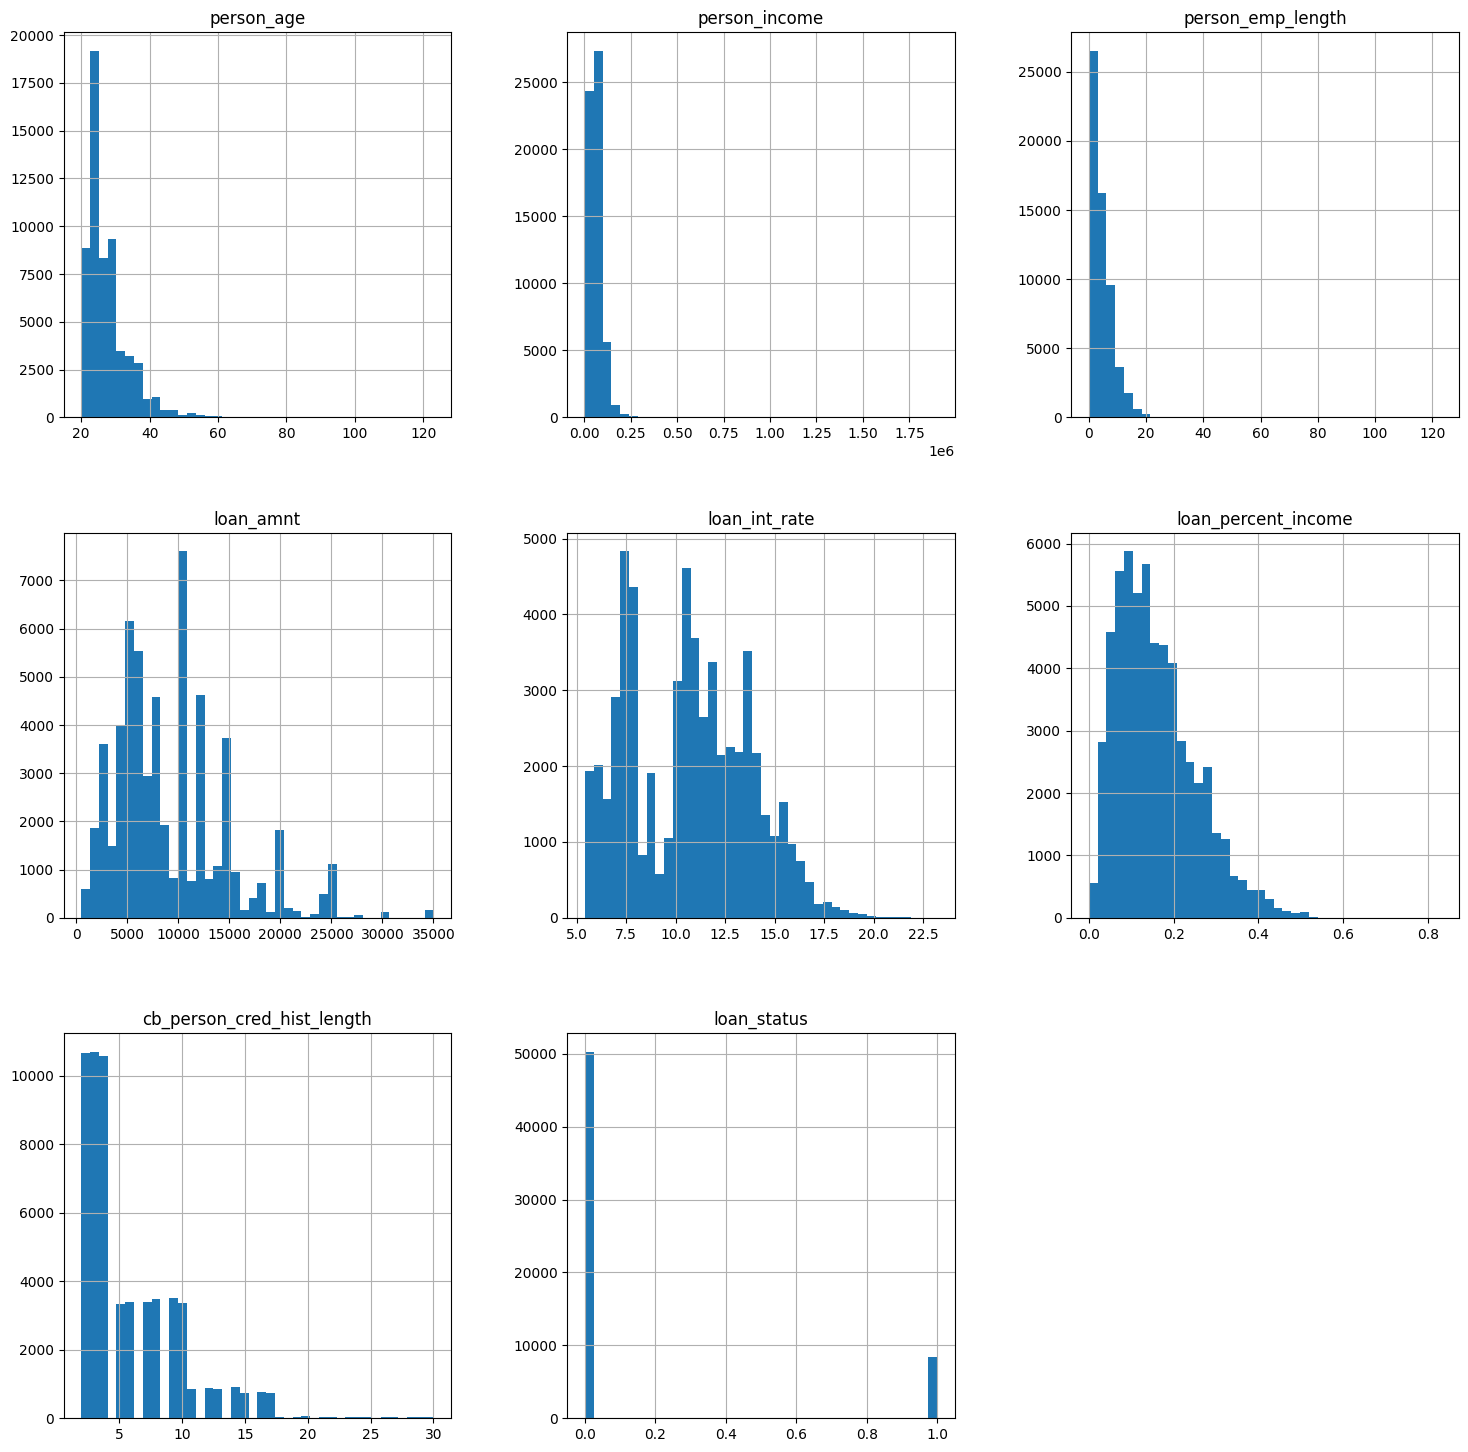

In [125]:
numeric = df.select_dtypes(include = ['float64', 'int64'])
numeric.hist(figsize=(18, 18), bins=40);#видим что таргет дисбалансен
'''
видим что в персон инком есть очень богатые люди не можем их не учитывать это же банк
для многих похожне стаж работы не известен тк очень много 0
лоан персен инкам очень крутой признак будет по ощущениям тк это отношение годовой зарплаты к сумме кредита. и если честно хочется его отлагорифмировать

вообще наверное можно было бы создать фичу которя бы вычитала из возраста челловека его историю кредита. как будто полезно что бы учитывать молодых.
'''

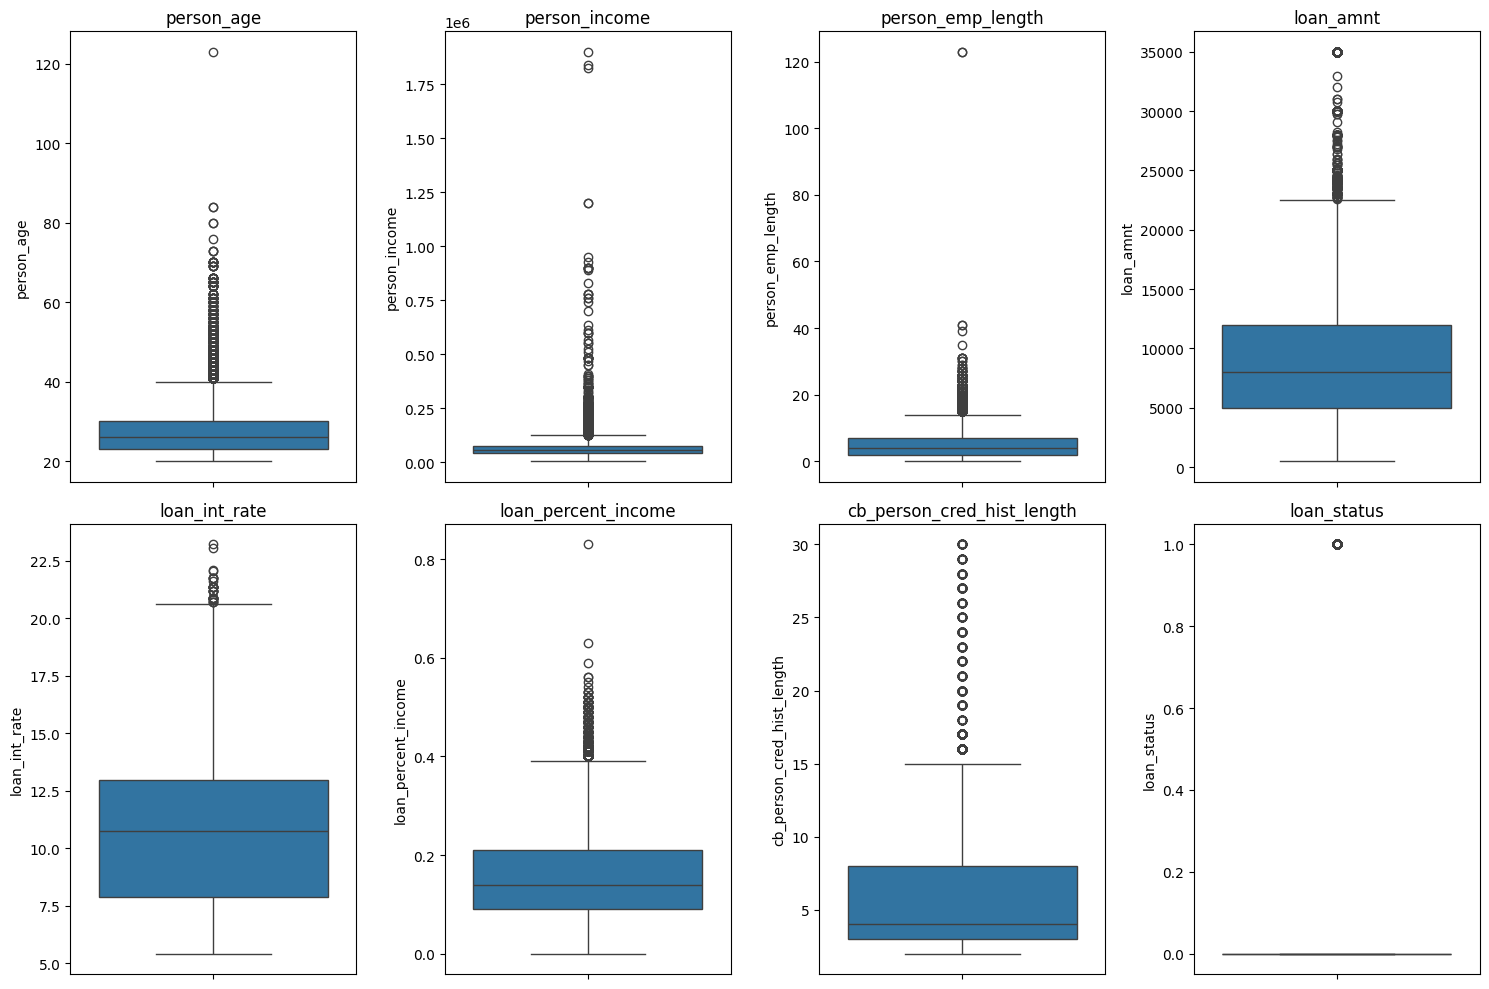

In [126]:
plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=numeric.columns[i], data=numeric)
    plt.title(numeric.columns[i])

plt.tight_layout()
plt.show()

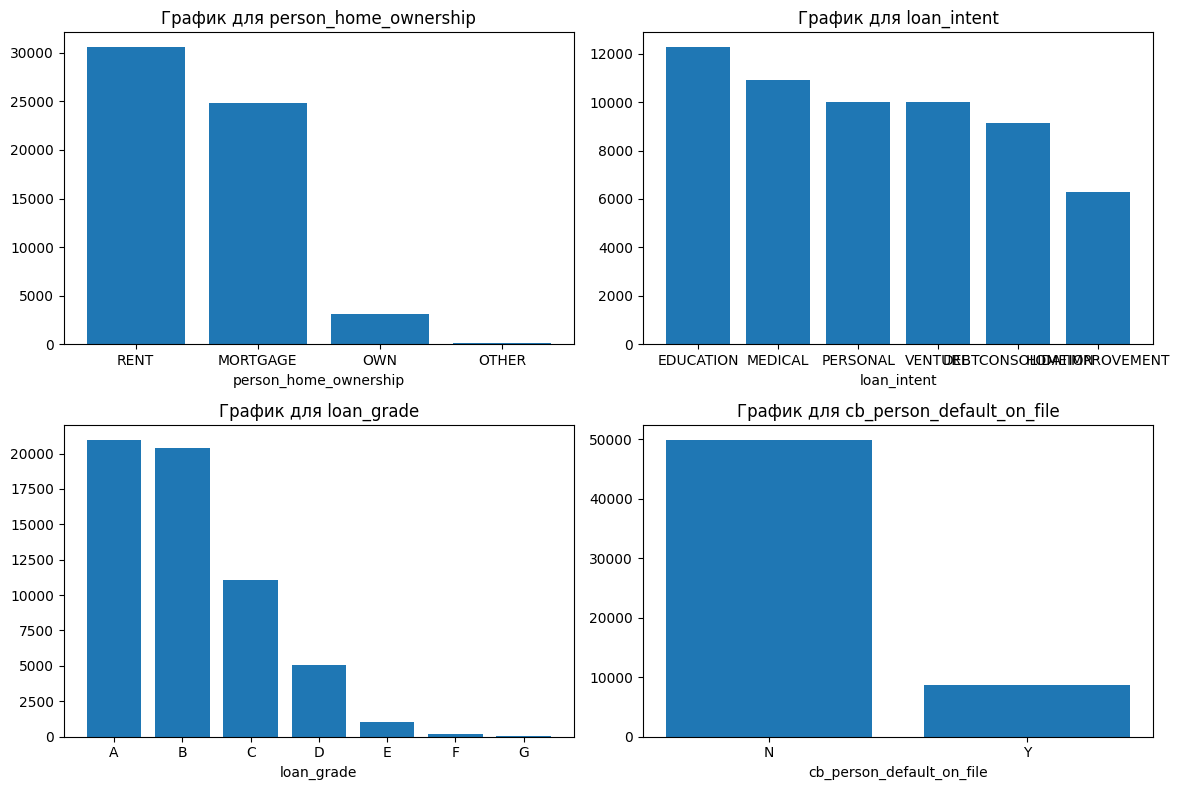

In [127]:
category=df.select_dtypes(exclude= ['float64', 'int64'])
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(category.columns):
    value_counts = category[col].value_counts()
    axes[i//2,i%2].bar(value_counts.index, value_counts.values)
    axes[i//2,i%2].set_title(f'График для {col}')
    axes[i//2,i%2].set_xlabel(col)

plt.tight_layout()
plt.show()
#наличие дефолта тоже похоже очен важен будет. и надо замнить лоан грейт на числа чтобы ранжирование сохралось

In [128]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [129]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G'], ['N', 'Y']]), ['loan_grade','cb_person_default_on_file']),

        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['person_home_ownership', 'loan_intent']),

        ('scaler', StandardScaler(), ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
        'cb_person_cred_hist_length'])
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train)#чтобы не было протечки даннных поэтому и разделили выше заранее датасет
X_val_transformed = preprocessor.transform(X_val)

X_train_final = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_val_final = pd.DataFrame(X_val_transformed, columns=preprocessor.get_feature_names_out())

train_data = X_train_final.assign(loan_status=y_train.values)#просто для матрицы кореляций

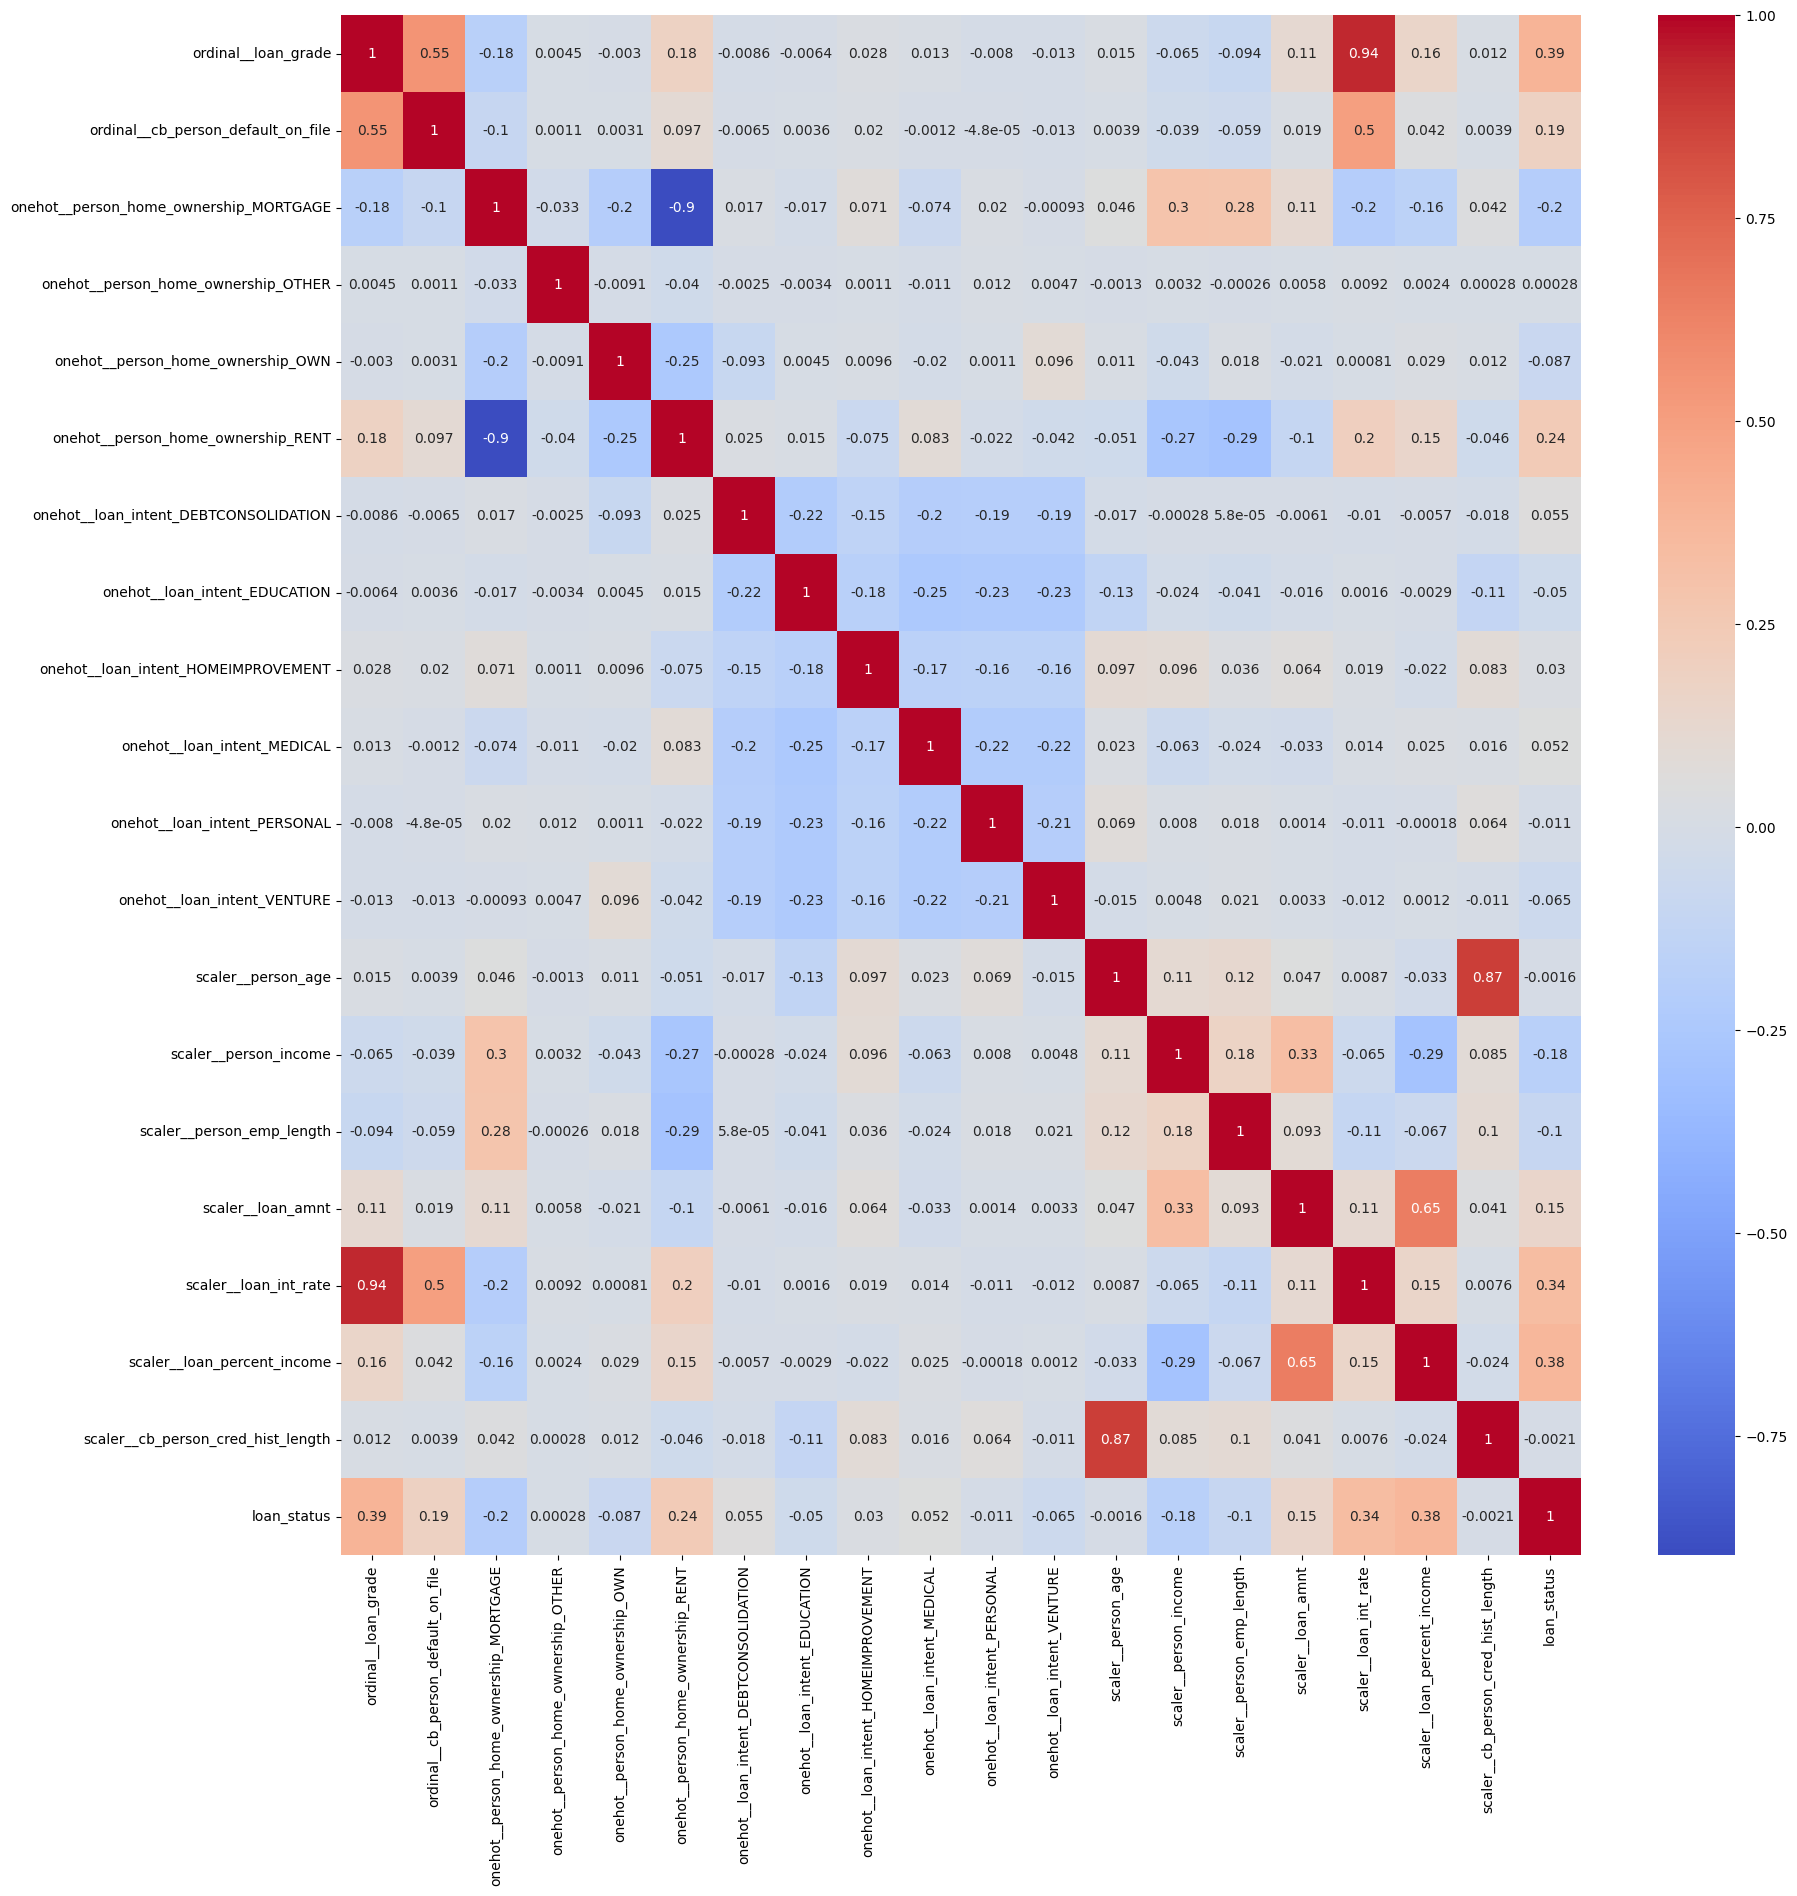

In [130]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm")
plt.show()
#ну прям то что стоит удалить не вижу все кореляции логически объяснятся
#как раз можно заметить что отношениесуммы дохода к долгу, оценка кредитора следовательно и процентная ставка сильно влияют на таргет

In [131]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

In [132]:
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val_final.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

batch_size = 512
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [133]:
class Net(nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(dim,512 )
        self.bn1 = nn.BatchNorm1d(512)
        self.d1 = nn.Dropout(0.1)

        self.fc2 = nn.Linear(512, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.d2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(128, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.d3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(32, 1)


    def forward(self, x):

        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.d1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.d2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.d3(x)

        x = self.fc4(x)
        return x

model = Net(X_train_final.shape[1])
print(model)

Net(
  (fc1): Linear(in_features=19, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=128, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (d3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
)


In [134]:
criterion = nn.BCEWithLogitsLoss()#тут сигмоида внутри
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [135]:
from sklearn.metrics import roc_auc_score

def run(model, dataloader, loss_function, optimizer=None):
    if optimizer == None:
        model.eval()
    else:
        model.train()

    total_loss = 0
    all_preds = []
    all_targets = []

    for X, y in dataloader:
        pred = model(X)
        y = y.unsqueeze(1)
        loss = loss_function(pred, y)
        total_loss += loss.item()

        all_preds.extend(pred.detach().cpu().numpy())
        all_targets.extend(y.cpu().numpy())


        if optimizer != None:
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

    return total_loss / len(dataloader), roc_auc_score(all_targets, all_preds)

In [136]:
NUM_EPOCHS = 100
patience = 10  # количество эпох без обновления
counter = 0
best_val_auc = 0

for i in range(NUM_EPOCHS):
    train_loss, train_auc = run(model, train_loader, criterion, optimizer)
    val_loss, val_auc = run(model, val_loader, criterion)

    print(f'Epoch {i+1} | Train Loss: {train_loss:.4f}, AUC_Train: {train_auc:.4f} | Val Loss: {val_loss:.4f}, AUC_Val: {val_auc:.4f}')

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), 'best_model.pth')#запоминаем лучшие веса
        print(f"Cохранение весов: {best_val_auc:.4f}")
        counter = 0
    else:
        counter += 1

    if counter >= patience:#чтобы долго не ждать
        print(f"Ранняя остановка на {i+1}-й эпохе. Лучшая AUC: {best_val_auc:.4f}")
        break

Epoch 1 | Train Loss: 0.4845, AUC_Train: 0.8792 | Val Loss: 0.3235, AUC_Val: 0.9160
Cохранение весов: 0.9160
Epoch 2 | Train Loss: 0.2725, AUC_Train: 0.9019 | Val Loss: 0.2260, AUC_Val: 0.9238
Cохранение весов: 0.9238
Epoch 3 | Train Loss: 0.2192, AUC_Train: 0.9085 | Val Loss: 0.2026, AUC_Val: 0.9264
Cохранение весов: 0.9264
Epoch 4 | Train Loss: 0.2010, AUC_Train: 0.9178 | Val Loss: 0.1866, AUC_Val: 0.9289
Cохранение весов: 0.9289
Epoch 5 | Train Loss: 0.1958, AUC_Train: 0.9195 | Val Loss: 0.1864, AUC_Val: 0.9289
Epoch 6 | Train Loss: 0.1922, AUC_Train: 0.9229 | Val Loss: 0.1828, AUC_Val: 0.9289
Epoch 7 | Train Loss: 0.1899, AUC_Train: 0.9242 | Val Loss: 0.1819, AUC_Val: 0.9292
Cохранение весов: 0.9292
Epoch 8 | Train Loss: 0.1881, AUC_Train: 0.9255 | Val Loss: 0.1840, AUC_Val: 0.9279
Epoch 9 | Train Loss: 0.1849, AUC_Train: 0.9288 | Val Loss: 0.1812, AUC_Val: 0.9303
Cохранение весов: 0.9303
Epoch 10 | Train Loss: 0.1856, AUC_Train: 0.9282 | Val Loss: 0.1802, AUC_Val: 0.9305
Cохранени

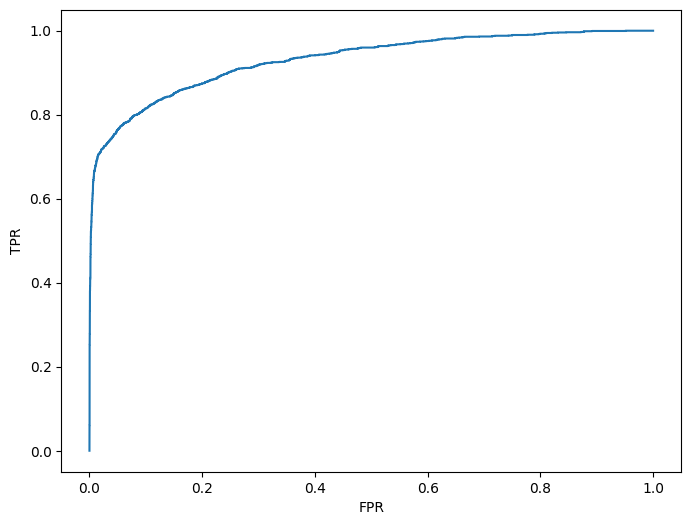

In [137]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model.load_state_dict(torch.load('best_model.pth'))
model.eval()

with torch.no_grad():
    val_preds = []
    val_targets = []

    for X_batch, y_batch in val_loader:
        logits = model(X_batch).squeeze(1)
        probs = torch.sigmoid(logits)#тк до этого сигмоида была в функции ошибки
        val_preds.extend(probs.cpu().numpy())
        val_targets.extend(y_batch.cpu().numpy())

fpr, tpr, _ = roc_curve(val_targets, val_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()# вывожу только валидацию


In [138]:
#пытаемся предсказать таргет теста

test=pd.read_csv('test.csv',header=0)

df_test=test.drop(['id'],axis=1)

X_test_transformed = preprocessor.transform(df_test)

X_test_final = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())

X_test_tensor = torch.tensor(X_test_final.values, dtype=torch.float32)

test_dataset = TensorDataset(X_test_tensor)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


model.load_state_dict(torch.load('best_model.pth'))
model.eval()

test_predictions = []

with torch.no_grad():

    for X_test in test_loader:
        logits = model(X_test[0]).squeeze(1)
        probs = torch.sigmoid(logits)
        test_predictions.extend(probs.cpu().numpy())


In [139]:
submission_df = pd.DataFrame(test_predictions, columns=['loan_status'])
submission_df['id'] = test['id'].astype(int)
submission_df = submission_df[['id', 'loan_status']]
submission_df.to_csv('submission.csv', index=False)#сохраняем для соревнования

In [140]:
!pip install catboost

In [141]:
#хочу проверить уже готовую библиотеку

from catboost import CatBoostClassifier

model1 = CatBoostClassifier(
    random_state=42,
    verbose=0
)
model1.fit(X_train_final, y_train)
y_val_pred1 = model1.predict_proba(X_val_final)[:, 1]

roc_auc1 = roc_auc_score(y_val, y_val_pred1)
print(f"ROC-AUC валидация: {roc_auc1:.4f}")

ROC-AUC валидация: 0.9574


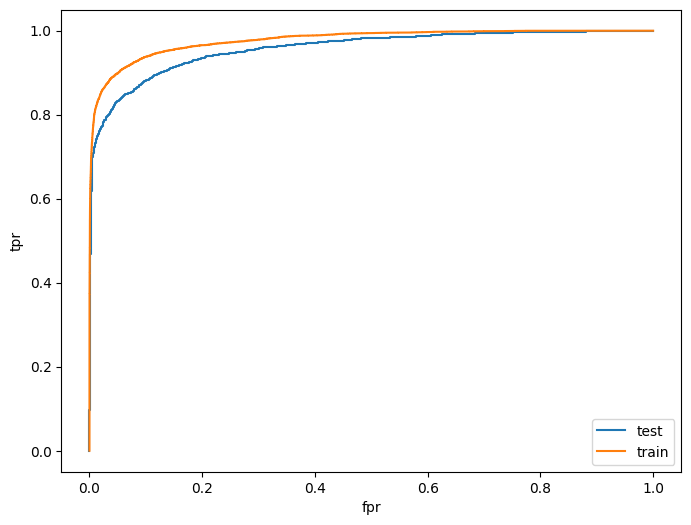

In [142]:
fpr_val1, tpr_val1, _ = roc_curve(y_val, y_val_pred1)
fpr_train1, tpr_train1, _ = roc_curve(y_train,  model1.predict_proba(X_train_final)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_val1, tpr_val1, label='test')
plt.plot(fpr_train1, tpr_train1, label='train')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

In [143]:
test_predictions2 = model1.predict_proba(X_test_final)[:, 1]
submission_df2 = pd.DataFrame(test_predictions2, columns=['loan_status'])
submission_df2['id'] = test['id'].astype(int)
submission_df2 = submission_df2[['id', 'loan_status']]
submission_df2.to_csv('submission(2).csv', index=False)